### Recently I published a self help book titled Inspiration: Thoughts on Spirituality, Technology, Wealth, Leadership and Motivation. The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA

In this notebook we will be doing classification of the documents based on their content.This is called as topic modelling.For this we will be making use of Pycaret Library.The notebook will be covering following topics.

1.Data import and preprocessing 

2.Setting Up the Environment 

3.Creating LDA And NMF models 

4.Analyse Trained Model


### You can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/npr-data/npr.csv


# 1.Data Import and Preprocessing

### Installing Pycaret 

In [2]:
! pip install pycaret

     |████████████████████████████████| 261 kB 2.7 MB/s 
     |████████████████████████████████| 101 kB 2.7 MB/s 
     |████████████████████████████████| 6.8 MB 3.7 MB/s 
     |████████████████████████████████| 14.2 MB 21.7 MB/s 
     |████████████████████████████████| 167 kB 44.8 MB/s 
     |████████████████████████████████| 1.1 MB 50.3 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 77 kB 4.3 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=e887b5fdcc28a3f00679440644414b2eda6dcf09b716a95366d47ed3d4c9cafd
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.14.2-py3-none-any.whl size=100732 sha256=3116023931a28e7767c089d673fbbe55a776b465ec673a8c889a9bbc2336090a
  Stored in directory: /root/.cache/pip/wheels/54/8a/cd/8861fff0bea4a752ffe7561eb74e130c9ae38cdb7e43eb7b66
  C

### Importing Dataset

In [3]:
data=pd.read_csv('../input/npr-data/npr.csv')
data.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


### Shape of Data 

In [4]:
data.shape

(11992, 1)

### Displaying First Document

In [5]:
data['Article'][0]

'In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31. When President Obama moved to sanction Russia over its alleged interference in the U. S. election just concluded, some Republicans who had long called for similar or more severe measures could scarcely bring themselves to approve. House Speaker Paul Ryan called the Obama measures ”appropriate” but also ”overdue” and ”a prime example of this administration’s ineffective foreign policy that has left America weaker in the eyes of the world.” Other GOP leaders sounded much the same theme. ”[We have] been urging President Obama for years to take strong action to deter Russia’s worldwide aggression, including its   operations,” wrote Rep. Devin Nunes,  . chairman of the House Intelligence Committee. ”Now with just a few weeks left in office, the president has suddenly decided that some stronger measures are indeed warranted.” Appearing 

# 2.Setting Up Environment

In [6]:
from pycaret.nlp import *
nlp1 = setup(data,target='Article',session_id=123)

Description,Value
session_id,123
Documents,11992
Vocab Size,57745
Custom Stopwords,False


# 3.Create a LDA Model

In [7]:
lda = create_model('lda')

In [8]:
print(lda)

LdaModel(num_terms=57745, num_topics=4, decay=0.5, chunksize=100)


### Non Negative Factorization

In [9]:
nmf = create_model('nmf')

In [10]:
print(nmf)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=123, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)


# 4.Analyze Trained Model

### Most Used Words

In [11]:
plot_model()

### Bigram 

In [12]:
plot_model(lda,plot='bigram')

### Part of Speech

In [13]:
plot_model(lda,plot='pos')

### Sentiment Polarity Distribution

In [14]:
plot_model(lda,plot='sentiment',topic_num='Topic 0')

### 3D TSNE Plot 

In [15]:
plot_model(lda,plot='tsne')

### U Map Projection of Documents

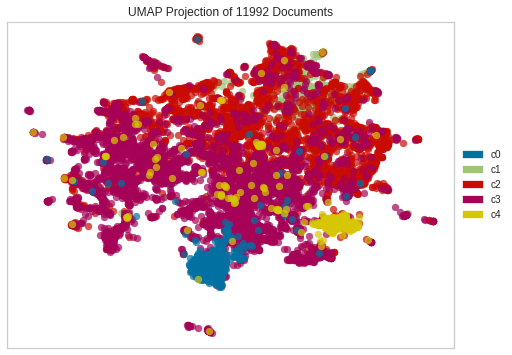

In [16]:
plot_model(lda,plot='umap')

### Document Distribution by Topic

In [17]:
plot_model(lda,plot='topic_distribution')

In [18]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# 5.Assign Topic Weights

In [19]:
lda_results = assign_model(lda)
lda_results.head()

,Article,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,even policy bipartisan politic sense year show...,0.115386,0.026114,0.808092,0.050409,Topic 2,0.81
1,use twitter prefer mean communication weigh is...,0.027853,0.001484,0.849780,0.120883,Topic 2,0.85
2,donald_trump unabashedly praise day outgoing i...,0.064016,0.001149,0.853633,0.081202,Topic 2,0.85
3,say expel diplomat response sanction suggest e...,0.071591,0.002126,0.733631,0.192652,Topic 2,0.73
4,video datum visualization immersive experience...,0.376685,0.219657,0.192483,0.211174,Topic 0,0.38


# 6.Conclusion

1.We have done topic modelling using Pycaret.Using Pycaret reduces the amont of coding needed to get the desired results.

2.We could find out List of 20 most used words,bigrams,Parts of speech,Sentiment Polarity.

3.We could classify the documents into four topics and could visualise it with 3D TSNE Plot,U Map Projection.

4.We can see that more documents in the category topic 0 

### You can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code

# TO BE CONTINUED